# Task 1

In [58]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

import numpy as np

def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        # write your code here.
        return np.random.uniform(mu-sigma/(3**(1/2)),mu+sigma/(3**(1/2)),n)
        pass
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        


In [59]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")

In [60]:
# IGD, the ordering is permitted to have replacement. 
#
#

f_i = lambda x,y: (1/2)*(x-y)**2
def IGD_wr_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    
    ## Set initial value of X0=0 and create a list to store value of f
    x=0
    x_vals = np.zeros(n)
    f_vals = np.zeros(n)
    x_vals[0] = x
    f_vals[0] = np.array([f_i(x,y[t]) for t in range(n)]).sum()

    for i in range(n-1):
        # update x, y and gamma
        gamma=1/(1+i)
        ytemp=y[ordering[i]]

        x = x - gamma*(x-ytemp)
        f = np.array([f_i(x,y[t]) for t in range(n)]).sum()
        
        # store x, f values for later use
        x_vals[i+1] = x
        f_vals[i+1] = f
        
        
    
    return x, f_vals, x_vals
    pass


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    
    ## Set initial value of X0=0 and create a list to store value of f
    x=0
    x_vals = np.zeros(n)
    f_vals = np.zeros(n)
    x_vals[0] = x
    f_vals[0] = np.array([f_i(x,y[t]) for t in range(n)]).sum()


    for i in range(n-1):
        # update x, y and gamma
        gamma=1/(1+i)
        ytemp=y[ordering[i]]
        
        x = x - gamma*(x-ytemp)
        f = np.array([f_i(x,y[t]) for t in range(n)]).sum()

        # store x, f values for later use
        x_vals[i+1] = x
        f_vals[i+1] = f
    
    return x, f_vals, x_vals
    pass

In [61]:
x_wr_normal, f_vals_wr_normal, x_vals_wr_normal = IGD_wr_task1(y1)
x_wo_normal, f_vals_wo_normal, x_vals_wo_normal = IGD_wo_task1(y1)
x_wr_uniform, f_vals_wr_uniform, x_vals_wr_uniform = IGD_wr_task1(y2)
x_wo_uniform, f_vals_wo_uniform, x_vals_wo_uniform = IGD_wo_task1(y2)

print ('final x value w/ replacement in setting 1 is ', x_wr_normal)
print ('final x value w/o replacement in setting 1 is', x_wo_normal)
print ('final x value w/ replacement in setting 2 is ', x_wr_uniform)
print ('final x value w/o replacement in setting 2 is', x_wo_uniform)


final x value w/ replacement in setting 1 is  0.41542573021900103
final x value w/o replacement in setting 1 is 0.3709354714341574
final x value w/ replacement in setting 2 is  0.46945058713547416
final x value w/o replacement in setting 2 is 0.4523826781529866


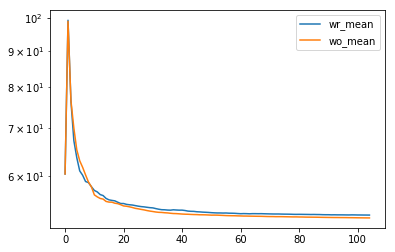

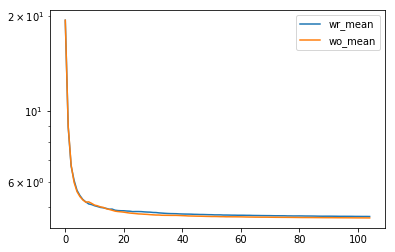

In [46]:
import matplotlib.pyplot as plt
wr_normal_mean=np.mean([IGD_wr_task1(y1)[1] for i in range(200)], axis=0)
wo_normal_mean=np.mean([IGD_wo_task1(y1)[1] for i in range(200)], axis=0)
wr_plot = plt.semilogy(wr_normal_mean, label='wr_mean')
wo_plot = plt.semilogy(wo_normal_mean, label='wo_mean')
plt.legend()
plt.show()

wr_uniform_mean=np.mean([IGD_wr_task1(y2)[1] for i in range(200)], axis=0)
wo_uniform_mean=np.mean([IGD_wo_task1(y2)[1] for i in range(200)], axis=0)
wr_plot = plt.semilogy(wr_uniform_mean, label='wr_mean')
wo_plot = plt.semilogy(wo_uniform_mean, label='wo_mean')
plt.legend()
plt.show()

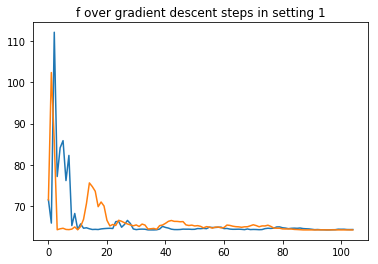

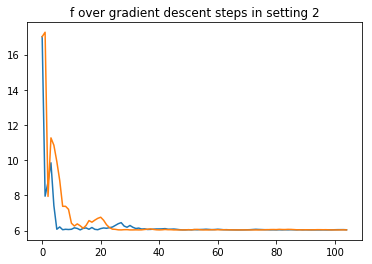

In [62]:
# let's see what the f values were   

import matplotlib.pyplot as plt
plt.title("f over gradient descent steps in setting 1")
plt.plot(range(len(y1)), f_vals_wr_normal, range(len(y1)), f_vals_wo_normal)
plt.show()

plt.title("f over gradient descent steps in setting 2")
plt.plot(range(len(y2)), f_vals_wr_uniform, range(len(y2)), f_vals_wo_uniform)
plt.show()

# Task 2

In [18]:
## generate the setting
## 𝛽𝑖 are sampled uniformly between [1,2]
beta = np.random.uniform(1, 2, 100)
y = 5
beta_min = min(beta)

In [19]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task2(beta, y):
    n = len(beta)
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x=0
    f_i=lambda x,b: (1/2)*b*(x-y)**2
    x_vals = np.zeros(n)
    f_vals = np.zeros(n)
    x_vals[0] = x
    f_vals[0] = np.array([f_i(x,beta[t]) for t in range(n)]).sum()
    gamma=0.05*beta_min

    for i in range(n-1):
        # update x, y and gamma
        
        b=beta[ordering[i]]

        x = x - gamma*b*(x-y)
        f = np.array([f_i(x,beta[t]) for t in range(n)]).sum()
        
        # store x, f values for later use
        x_vals[i+1] = x
        f_vals[i+1] = f
        
        
    
    return x, f_vals, x_vals
    pass


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task2(beta, y):
    n = len(beta)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x=0
    f_i=lambda x,b: (1/2)*b*(x-y)**2
    x_vals = np.zeros(n)
    f_vals = np.zeros(n)
    x_vals[0] = x
    f_vals[0] = np.array([f_i(x,beta[t]) for t in range(n)]).sum()
    gamma=0.05*beta_min

    for i in range(n-1):
        # update x, y and gamma
        
        b=beta[ordering[i]]

        x = x - gamma*b*(x-y)
        f = np.array([f_i(x,beta[t]) for t in range(n)]).sum()
        
        # store x, f values for later use
        x_vals[i+1] = x
        f_vals[i+1] = f
        
        
    
    return x, f_vals, x_vals
    pass

In [20]:
x_wr_task2, f_vals_wr_task2, x_vals_wr_task2 = IGD_wr_task2(beta,y)
x_wo_task2, f_vals_wo_task2, x_vals_wo_task2 = IGD_wo_task2(beta, y)

print ('final x value w/ replacement in setting 1 is ', x_wr_normal)
print ('final x value w/o replacement in setting 1 is', x_wo_normal)


final x value w/ replacement in setting 1 is  0.5754400766013175
final x value w/o replacement in setting 1 is 0.5666535136867069


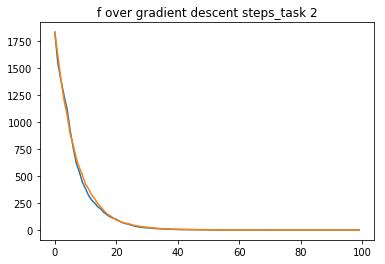

In [21]:
# let's see what the f values were   

import matplotlib.pyplot as plt
plt.title("f over gradient descent steps_task 2")
plt.plot(range(len(beta)), f_vals_wr_task2, range(len(beta)), f_vals_wo_task2)
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

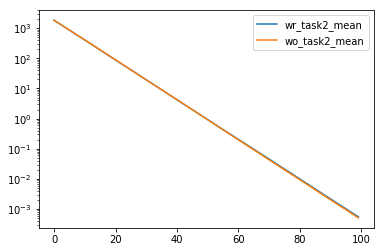

In [31]:
import matplotlib.pyplot as plt
wr_task2_mean=np.mean([IGD_wr_task2(beta, y)[1] for i in range(200)], axis=0)
wo_task2_mean=np.mean([IGD_wo_task2(beta, y)[1] for i in range(200)], axis=0)
wr_plot = plt.semilogy(wr_task2_mean, label='wr_task2_mean')
wo_plot = plt.semilogy(wo_task2_mean, label='wo_task2_mean')
plt.legend()
plt.show

/Users/meng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


<function matplotlib.pyplot.show(*args, **kw)>

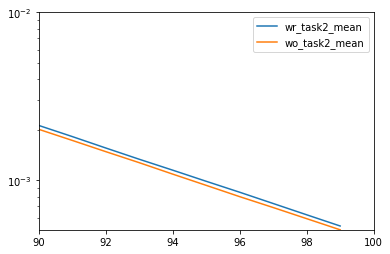

In [30]:
import matplotlib.pyplot as plt
wr_task2_mean=np.mean([IGD_wr_task2(beta, y)[1] for i in range(200)], axis=0)
wo_task2_mean=np.mean([IGD_wo_task2(beta, y)[1] for i in range(200)], axis=0)
wr_plot = plt.semilogy(wr_task2_mean, label='wr_task2_mean')
wo_plot = plt.semilogy(wo_task2_mean, label='wo_task2_mean')
plt.legend()
plt.ylim((0,0.01))
plt.xlim((90,100))
plt.show

# Task 3

In [1]:
# generation of exact solution and data y and matrix A.
import numpy as np
def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

In [2]:
# We generate the problem with 200x100 matrix. rho as 0.01.
#
A, xstar, y = generate_problem_task3(200, 100, 0.01)

In [3]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
import copy
def IGD_wr_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    m=len(y)
    n=np.shape(A)[1]
    ordering = np.random.choice(n, n, replace=True)
    x= np.zeros(n)
    x_vals = []
    f_vals = []
    x_vals.append(copy.deepcopy(x))
    F= lambda x: np.matmul(A, x)-y ## Ax-y, an m*1 vector, need to sum the square of each entry
    f_vals.append(np.array([F(x)[t]**2 for t in range(m)]).sum())

    for i in range(n-1):
        # update x, ai,y and f
        gamma=0.001
        ytemp=y[ordering[i]]
        ai=A[ordering[i]]
        x -= gamma*(np.matmul(ai, x)-ytemp)*ai
        f = np.array([F(x)[t]**2 for t in range(m)]).sum()
        
        # store x, f values for later use
        x_vals.append(copy.deepcopy(x))
        f_vals.append(f)
        
    return x, f_vals, x_vals
    pass


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    m=len(y)
    n=np.shape(A)[1]
    ordering = np.random.choice(n, n, replace=False)
    x= np.zeros(n)
    x_vals =[]
    f_vals = []
    x_vals.append(copy.deepcopy(x))
    F= lambda x: np.matmul(A, x)-y ## Ax-y, an m*1 vector, need to sum the square of each entry
    f_vals.append(np.array([F(x)[t]**2 for t in range(m)]).sum())

    for i in range(n-1):
        # update x, ai,y and f
        gamma=0.001
        ytemp=y[ordering[i]]
        ai=A[ordering[i]]
        x -= gamma*(np.matmul(ai, x)-ytemp)*ai
        f = np.array([F(x)[t]**2 for t in range(m)]).sum()
        
        # store x, f values for later use
        x_vals.append(copy.deepcopy(x))
        f_vals.append(f)
          
    return x, f_vals, x_vals
    pass

In [4]:
x_wr, f_vals_wr, x_vals_wr = IGD_wr_task3(y, A)
x_wo, f_vals_wo, x_vals_wo = IGD_wo_task3(y, A)

print ('final x value w/ replacement is ', x_wr)
print ('final x value w/o replacement is', x_wo)


final x value w/ replacement is  [ 0.05428685  0.11401464  0.05016303  0.04553542 -0.05697174  0.17122213
  0.06703512  0.09209533  0.0359392   0.13927514  0.10126192  0.01683435
  0.08544803 -0.03071753  0.13660319 -0.00916896 -0.06238474  0.02930212
 -0.02879202  0.03363983  0.14993145 -0.00150228  0.09656805  0.10759613
  0.03136276 -0.01202953 -0.01030433 -0.00212129 -0.05680521  0.12460055
  0.18298824  0.08959667  0.08192863  0.14143784  0.00584655 -0.08683548
  0.0230563  -0.0100862   0.07806472  0.04509382  0.01706491  0.00039607
  0.11573556  0.03778065 -0.05461176 -0.00760752  0.01325537  0.00706434
  0.01085885  0.10997331  0.08517174  0.10038903  0.03646702  0.00980624
 -0.02523854 -0.0180076   0.06455326  0.07923734 -0.05791594  0.08185923
  0.0306986   0.01267335 -0.02181732  0.09775556  0.01936831  0.00719945
 -0.0306104  -0.00906151  0.01996793  0.04299241  0.0825037   0.07343856
 -0.00188095  0.05456473  0.05750128  0.04664336 -0.00741437 -0.07521191
  0.13363633  0.02

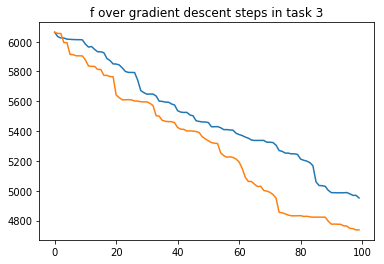

In [6]:
# let's see what the f values were   

import matplotlib.pyplot as plt
plt.title("f over gradient descent steps in task 3")
plt.plot(range(100),f_vals_wr,range(100), f_vals_wo)
plt.show()


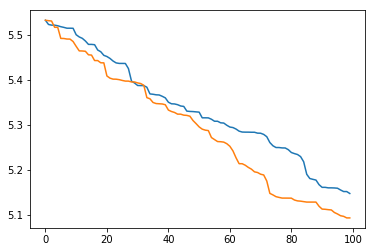

In [7]:
## Let's see how x convergers to xstar by plotting histories of norm(x-xstar)
norm_wr=np.array([np.linalg.norm(x_vals_wr[t]-xstar) for t in range(100)])
norm_wo=np.array([np.linalg.norm(x_vals_wo[t]-xstar) for t in range(100)])
plt.plot(range(100),norm_wr,range(100), norm_wo)
plt.show()

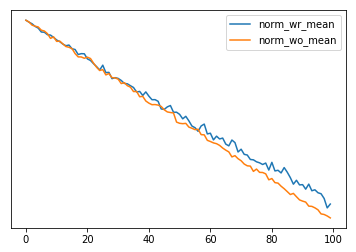

In [10]:
norm_wr_mean=np.mean([np.array([np.linalg.norm(IGD_wr_task3(y,A)[2][t]-xstar)for t in range (100)]) for i in range(50)], axis=0)
norm_wo_mean=np.mean([np.array([np.linalg.norm(IGD_wo_task3(y,A)[2][t]-xstar)for t in range (100)]) for i in range(50)], axis=0)
norm_wr_plot = plt.semilogy(norm_wr_mean, label='norm_wr_mean')
norm_wo_plot = plt.semilogy(norm_wo_mean, label='norm_wo_mean')
plt.legend()
plt.show()

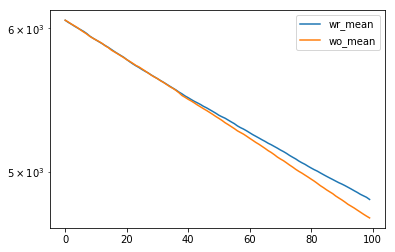

In [8]:
wr_mean=np.mean([IGD_wr_task3(y,A)[1] for i in range(200)], axis=0)
wo_mean=np.mean([IGD_wo_task3(y,A)[1] for i in range(200)], axis=0)
wr_plot = plt.semilogy(wr_mean, label='wr_mean')
wo_plot = plt.semilogy(wo_mean, label='wo_mean')
plt.legend()
plt.show()